<a href="https://colab.research.google.com/github/21Ovi/TensorFlow_/blob/main/Neural_network_classification_with_TensorFlow_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification with TensorFlow Exercises

In [28]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Importing dataset
from sklearn.datasets import make_moons
features, labels = make_moons(n_samples=1000, noise=0.05, random_state=42)

colors = ['maroon', 'forestgreen']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [30]:
data = pd.DataFrame({"X0":features[:, 0], "X1":features[:, 1], "label":labels})
data.head()

,X0,X1,label
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1
2,0.904059,-0.376520,1
3,0.377363,-0.397037,1
4,-0.841926,0.530587,0


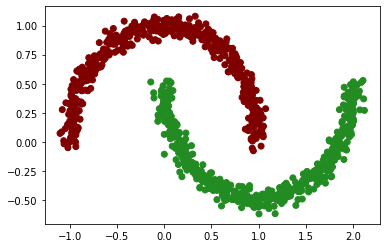

In [27]:
plt.scatter(features[:,0], features[:,1], c=vectorizer(labels));

In [34]:
# Splitting into training and test data
X = data.drop("label", axis=1)
y = data.label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
from tensorflow.python import metrics
# Creating neural network model

# Set random seed
tf.random.set_seed(42)

# Create model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, tf.keras.activations.sigmoid)
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7764 - accuracy: 0.5000
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7062 - accuracy: 0.5100
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.5312
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.5688
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.5614 - accuracy: 0.6400
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5265 - accuracy: 0.7800
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4965 - accuracy: 0.8263
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4709 - accuracy: 0.8475
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8587
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.4290 - accuracy: 0.8662
Epoch 11/

In [37]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 1.0000


[0.01445288397371769, 1.0]

Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: see the classification tutorial in the TensorFlow documentation for ideas.

Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.